In [1]:
import random
import numpy as np
import simpy
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
ARRIVAL_RATE = 12
SERVICE_TIME_MEAN = 60
SIM_TIME = 30 * 24 * 60

### We are implementing a simple SimPy model for the user's parameters and run baseline + 3 scenarios.

#### Baseline: 2 gates, 3 crews

In [3]:
NUM_GATES = 2
NUM_CREWS = 3

In [4]:
def flight(env, name, gate, crew):
    global wait_times, service_times, flight_count

    arrival_time = env.now

    with gate.request() as g, crew.request() as c:
        yield g & c
        wait = env.now - arrival_time
        wait_times.append(wait)

        service_time = np.random.exponential(SERVICE_TIME_MEAN)
        service_times.append(service_time)

        yield env.timeout(service_time)
        flight_count += 1
    
def flight_arrival(env, gate, crew):
    while True:
        interarrival = np.random.exponential(24*60 / ARRIVAL_RATE)
        yield env.timeout(interarrival)
        env.process(flight(env, f'Flight {env.now:.1f}', gate, crew))

# Initialize metrics
wait_times = []
service_times = []
flight_count = 0

# Set up environment
env = simpy.Environment()
gate_resource = simpy.Resource(env, capacity=NUM_GATES)
crew_resource = simpy.Resource(env, capacity=NUM_CREWS)

# Start simulation
env.process(flight_arrival(env, gate_resource, crew_resource))
env.run(until=SIM_TIME)

print(f"Total flights served: {flight_count}")
print(f"Average wait time: {np.mean(wait_times):.2f} minutes")
print(f"Average service time: {np.mean(service_times):.2f} minutes")

Total flights served: 337
Average wait time: 1.80 minutes
Average service time: 60.81 minutes


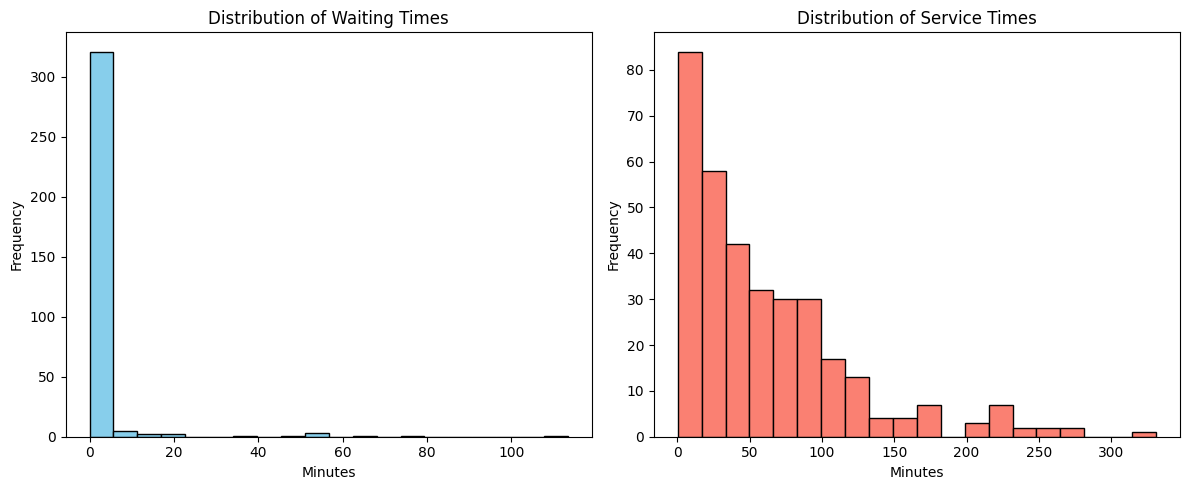

In [5]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(wait_times, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Waiting Times")
plt.xlabel("Minutes")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(service_times, bins=20, color='salmon', edgecolor='black')
plt.title("Distribution of Service Times")
plt.xlabel("Minutes")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [6]:
def run_simulation(gates, crews, arrival_rate, sim_time=30*24*60):
    global wait_times, service_times, flight_count
    wait_times = []
    service_times = []
    flight_count = 0

    env = simpy.Environment()
    gate_res = simpy.Resource(env, capacity=gates)
    crew_res = simpy.Resource(env, capacity=crews)

    def flight_arrival(env, gate, crew):
        while True:
            interarrival = np.random.exponential(24*60 / arrival_rate)
            yield env.timeout(interarrival)
            env.process(flight(env, f'Flight {env.now:.1f}', gate, crew))

    env.process(flight_arrival(env, gate_res, crew_res))
    env.run(until=sim_time)

    return {
        'avg_wait': np.mean(wait_times),
        'avg_service': np.mean(service_times),
        'count': flight_count
    }

In [7]:
import pandas as pd

results = []
n_replications = 20

for r in range(n_replications):
    # Setting different random number seeds here ensures independence
    np.random.seed(r)
    res = run_simulation(gates=3, crews=2, arrival_rate=20, sim_time=30*24*60)
    res['rep'] = r + 1
    results.append(res)

df_results = pd.DataFrame(results)
# Calculate the mean and confidence interval
avg_wait_mean = df_results['avg_wait'].mean()
avg_wait_std = df_results['avg_wait'].std()
print(f"Average wait time over {n_replications} replications: {avg_wait_mean:.2f} ± {1.96*avg_wait_std/np.sqrt(n_replications):.2f}")

Average wait time over 20 replications: 11.56 ± 1.40


#### S1: +1 Gate (3 gates, 3 crews)

In [8]:
NUM_GATES = 3
NUM_CREWS = 3

In [9]:
def flight(env, name, gate, crew):
    global wait_times, service_times, flight_count

    arrival_time = env.now

    with gate.request() as g, crew.request() as c:
        yield g & c
        wait = env.now - arrival_time
        wait_times.append(wait)

        service_time = np.random.exponential(SERVICE_TIME_MEAN)
        service_times.append(service_time)

        yield env.timeout(service_time)
        flight_count += 1
    
def flight_arrival(env, gate, crew):
    while True:
        interarrival = np.random.exponential(24*60 / ARRIVAL_RATE)
        yield env.timeout(interarrival)
        env.process(flight(env, f'Flight {env.now:.1f}', gate, crew))

# Initialize metrics
wait_times = []
service_times = []
flight_count = 0

# Set up environment
env = simpy.Environment()
gate_resource = simpy.Resource(env, capacity=NUM_GATES)
crew_resource = simpy.Resource(env, capacity=NUM_CREWS)

# Start simulation
env.process(flight_arrival(env, gate_resource, crew_resource))
env.run(until=SIM_TIME)

print(f"Total flights served: {flight_count}")
print(f"Average wait time: {np.mean(wait_times):.2f} minutes")
print(f"Average service time: {np.mean(service_times):.2f} minutes")

Total flights served: 329
Average wait time: 0.00 minutes
Average service time: 58.06 minutes


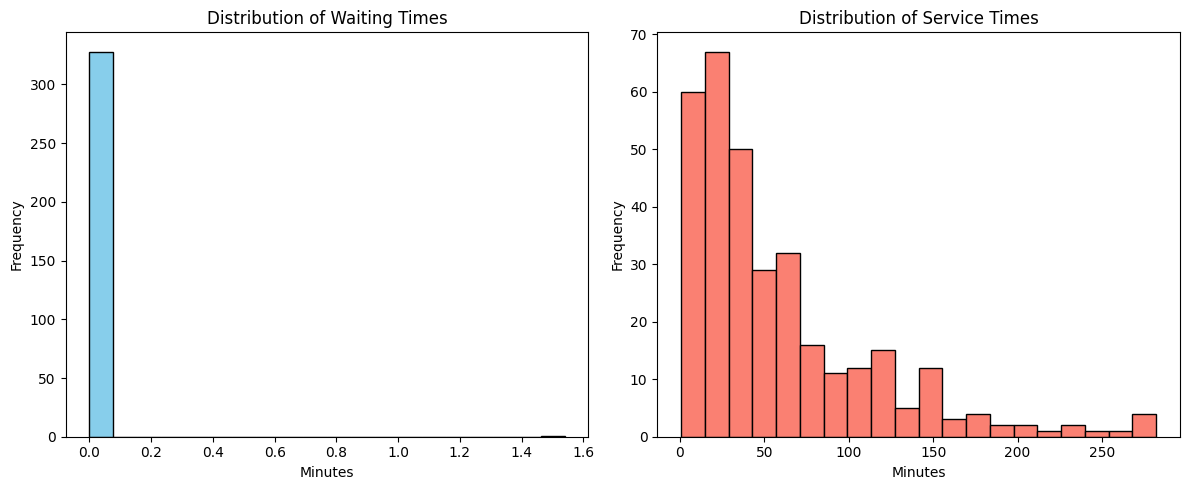

In [10]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(wait_times, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Waiting Times")
plt.xlabel("Minutes")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(service_times, bins=20, color='salmon', edgecolor='black')
plt.title("Distribution of Service Times")
plt.xlabel("Minutes")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [11]:
def run_simulation(gates, crews, arrival_rate, sim_time=30*24*60):
    global wait_times, service_times, flight_count
    wait_times = []
    service_times = []
    flight_count = 0

    env = simpy.Environment()
    gate_res = simpy.Resource(env, capacity=gates)
    crew_res = simpy.Resource(env, capacity=crews)

    def flight_arrival(env, gate, crew):
        while True:
            interarrival = np.random.exponential(24*60 / arrival_rate)
            yield env.timeout(interarrival)
            env.process(flight(env, f'Flight {env.now:.1f}', gate, crew))

    env.process(flight_arrival(env, gate_res, crew_res))
    env.run(until=sim_time)

    return {
        'avg_wait': np.mean(wait_times),
        'avg_service': np.mean(service_times),
        'count': flight_count
    }

In [12]:
import pandas as pd

results = []
n_replications = 20

for r in range(n_replications):
    # Setting different random number seeds here ensures independence
    np.random.seed(r)
    res = run_simulation(gates=3, crews=3, arrival_rate=20, sim_time=30*24*60)
    res['rep'] = r + 1
    results.append(res)

df_results = pd.DataFrame(results)
# Calculate the mean and confidence interval
avg_wait_mean = df_results['avg_wait'].mean()
avg_wait_std = df_results['avg_wait'].std()
print(f"Average wait time over {n_replications} replications: {avg_wait_mean:.2f} ± {1.96*avg_wait_std/np.sqrt(n_replications):.2f}")

Average wait time over 20 replications: 1.50 ± 0.32


#### S2: +1 Crew (2 gates, 4 crews)

In [13]:
NUM_GATES = 2
NUM_CREWS = 4

In [14]:
def flight(env, name, gate, crew):
    global wait_times, service_times, flight_count

    arrival_time = env.now

    with gate.request() as g, crew.request() as c:
        yield g & c
        wait = env.now - arrival_time
        wait_times.append(wait)

        service_time = np.random.exponential(SERVICE_TIME_MEAN)
        service_times.append(service_time)

        yield env.timeout(service_time)
        flight_count += 1
    
def flight_arrival(env, gate, crew):
    while True:
        interarrival = np.random.exponential(24*60 / ARRIVAL_RATE)
        yield env.timeout(interarrival)
        env.process(flight(env, f'Flight {env.now:.1f}', gate, crew))

# Initialize metrics
wait_times = []
service_times = []
flight_count = 0

# Set up environment
env = simpy.Environment()
gate_resource = simpy.Resource(env, capacity=NUM_GATES)
crew_resource = simpy.Resource(env, capacity=NUM_CREWS)

# Start simulation
env.process(flight_arrival(env, gate_resource, crew_resource))
env.run(until=SIM_TIME)

print(f"Total flights served: {flight_count}")
print(f"Average wait time: {np.mean(wait_times):.2f} minutes")
print(f"Average service time: {np.mean(service_times):.2f} minutes")

Total flights served: 324
Average wait time: 1.10 minutes
Average service time: 56.20 minutes


In [15]:
def run_simulation(gates, crews, arrival_rate, sim_time=30*24*60):
    global wait_times, service_times, flight_count
    wait_times = []
    service_times = []
    flight_count = 0

    env = simpy.Environment()
    gate_res = simpy.Resource(env, capacity=gates)
    crew_res = simpy.Resource(env, capacity=crews)

    def flight_arrival(env, gate, crew):
        while True:
            interarrival = np.random.exponential(24*60 / arrival_rate)
            yield env.timeout(interarrival)
            env.process(flight(env, f'Flight {env.now:.1f}', gate, crew))

    env.process(flight_arrival(env, gate_res, crew_res))
    env.run(until=sim_time)

    return {
        'avg_wait': np.mean(wait_times),
        'avg_service': np.mean(service_times),
        'count': flight_count
    }

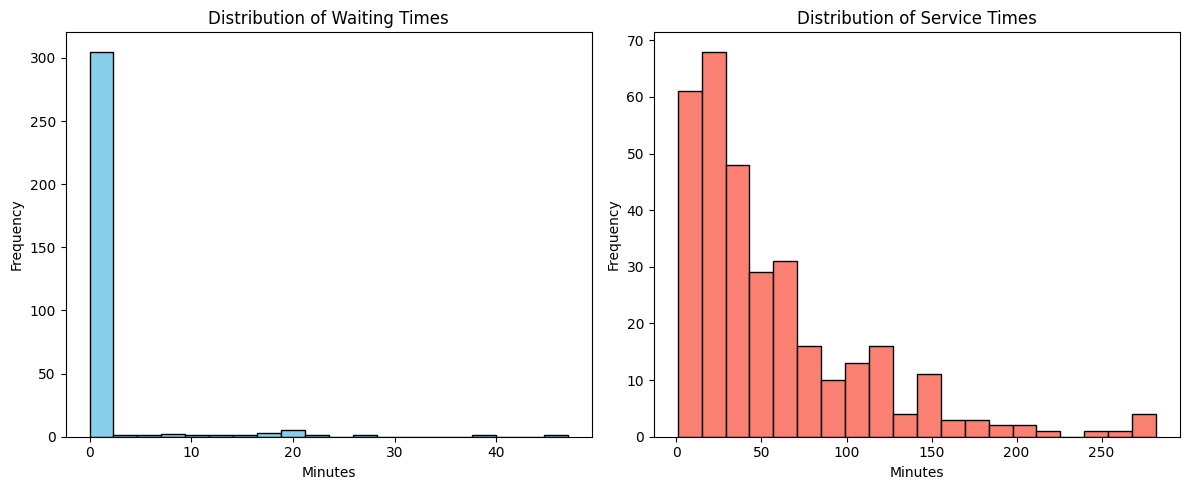

In [16]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(wait_times, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Waiting Times")
plt.xlabel("Minutes")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(service_times, bins=20, color='salmon', edgecolor='black')
plt.title("Distribution of Service Times")
plt.xlabel("Minutes")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [17]:
def run_simulation(gates, crews, arrival_rate, sim_time=30*24*60):
    global wait_times, service_times, flight_count
    wait_times = []
    service_times = []
    flight_count = 0

    env = simpy.Environment()
    gate_res = simpy.Resource(env, capacity=gates)
    crew_res = simpy.Resource(env, capacity=crews)

    def flight_arrival(env, gate, crew):
        while True:
            interarrival = np.random.exponential(24*60 / arrival_rate)
            yield env.timeout(interarrival)
            env.process(flight(env, f'Flight {env.now:.1f}', gate, crew))

    env.process(flight_arrival(env, gate_res, crew_res))
    env.run(until=sim_time)

    return {
        'avg_wait': np.mean(wait_times),
        'avg_service': np.mean(service_times),
        'count': flight_count
    }

In [18]:
import pandas as pd

results = []
n_replications = 20

for r in range(n_replications):
    # Setting different random number seeds here ensures independence
    np.random.seed(r)
    res = run_simulation(gates=2, crews=4, arrival_rate=20, sim_time=30*24*60)
    res['rep'] = r + 1
    results.append(res)

df_results = pd.DataFrame(results)
# Calculate the mean and confidence interval
avg_wait_mean = df_results['avg_wait'].mean()
avg_wait_std = df_results['avg_wait'].std()
print(f"Average wait time over {n_replications} replications: {avg_wait_mean:.2f} ± {1.96*avg_wait_std/np.sqrt(n_replications):.2f}")

Average wait time over 20 replications: 11.56 ± 1.40


#### S3: +2 Gates (4 gates, 3 crews)

In [19]:
NUM_GATES = 4
NUM_CREWS = 3

In [20]:
def flight(env, name, gate, crew):
    global wait_times, service_times, flight_count

    arrival_time = env.now

    with gate.request() as g, crew.request() as c:
        yield g & c
        wait = env.now - arrival_time
        wait_times.append(wait)

        service_time = np.random.exponential(SERVICE_TIME_MEAN)
        service_times.append(service_time)

        yield env.timeout(service_time)
        flight_count += 1
    
def flight_arrival(env, gate, crew):
    while True:
        interarrival = np.random.exponential(24*60 / ARRIVAL_RATE)
        yield env.timeout(interarrival)
        env.process(flight(env, f'Flight {env.now:.1f}', gate, crew))

# Initialize metrics
wait_times = []
service_times = []
flight_count = 0

# Set up environment
env = simpy.Environment()
gate_resource = simpy.Resource(env, capacity=NUM_GATES)
crew_resource = simpy.Resource(env, capacity=NUM_CREWS)

# Start simulation
env.process(flight_arrival(env, gate_resource, crew_resource))
env.run(until=SIM_TIME)

print(f"Total flights served: {flight_count}")
print(f"Average wait time: {np.mean(wait_times):.2f} minutes")
print(f"Average service time: {np.mean(service_times):.2f} minutes")

Total flights served: 329
Average wait time: 0.00 minutes
Average service time: 58.06 minutes


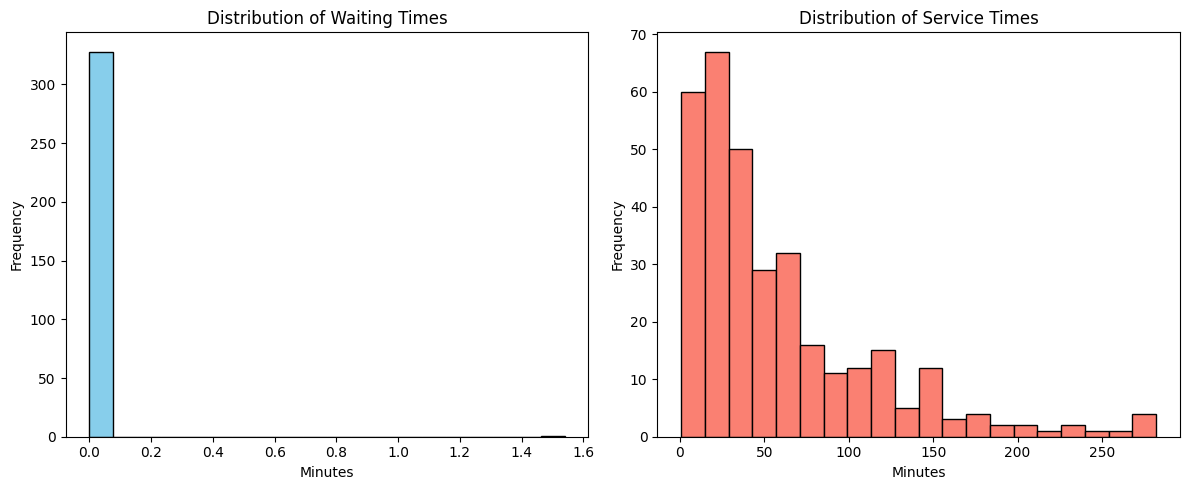

In [21]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(wait_times, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Waiting Times")
plt.xlabel("Minutes")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(service_times, bins=20, color='salmon', edgecolor='black')
plt.title("Distribution of Service Times")
plt.xlabel("Minutes")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [22]:
def run_simulation(gates, crews, arrival_rate, sim_time=30*24*60):
    global wait_times, service_times, flight_count
    wait_times = []
    service_times = []
    flight_count = 0

    env = simpy.Environment()
    gate_res = simpy.Resource(env, capacity=gates)
    crew_res = simpy.Resource(env, capacity=crews)

    def flight_arrival(env, gate, crew):
        while True:
            interarrival = np.random.exponential(24*60 / arrival_rate)
            yield env.timeout(interarrival)
            env.process(flight(env, f'Flight {env.now:.1f}', gate, crew))

    env.process(flight_arrival(env, gate_res, crew_res))
    env.run(until=sim_time)

    return {
        'avg_wait': np.mean(wait_times),
        'avg_service': np.mean(service_times),
        'count': flight_count
    }

In [23]:
import pandas as pd

results = []
n_replications = 20

for r in range(n_replications):
    # Setting different random number seeds here ensures independence
    np.random.seed(r)
    res = run_simulation(gates=4, crews=3, arrival_rate=20, sim_time=30*24*60)
    res['rep'] = r + 1
    results.append(res)

df_results = pd.DataFrame(results)
# Calculate the mean and confidence interval
avg_wait_mean = df_results['avg_wait'].mean()
avg_wait_std = df_results['avg_wait'].std()
print(f"Average wait time over {n_replications} replications: {avg_wait_mean:.2f} ± {1.96*avg_wait_std/np.sqrt(n_replications):.2f}")

Average wait time over 20 replications: 1.50 ± 0.32
